In [1]:
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster import hierarchy
from scipy.spatial import distance

%matplotlib inline  

In [2]:
%run ../reports/chipseq_diff_plots.py

In [3]:
path = "/mnt/stripe/bio/experiments/compare-chip-seq-tools"

output_path = "/mnt/stripe/bio/experiments/compare-chip-seq-tools/processed"

diffs_dict = {}

for mark in ['H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K36me3']:
    print(mark)
    out = os.path.join(output_path, mark)

    if os.path.exists(out):
        shutil.rmtree(out)
        os.mkdir(out)

    diffs = DiffProcessor(path, out, mark)
    diffs.collect_difference()
    
    diffs_dict[mark] = diffs 

H3K27ac
H3K27me3
H3K4me1
H3K4me3
H3K36me3


## H3K27ac

In [4]:
diffs = diffs_dict['H3K27ac']

In [5]:
pd.DataFrame.from_records(diffs.get_counts(), columns=["name", "both", "young", "old"])

,name,both,young,old
0,diff_bind_H3K27ac_TRUE_125_6_difference,2,1,1
1,diff_bind_H3K27ac_TRUE_125_10_difference,2,1,1
2,diff_bind_H3K27ac_TRUE_125_7_difference,2,1,1
3,diff_bind_H3K27ac_TRUE_125_5_difference,2,1,1
4,diff_bind_H3K27ac_FALSE_125_6_difference,2,1,1
5,diff_bind_H3K27ac_FALSE_125_10_difference,2,1,1
6,diff_bind_H3K27ac_FALSE_125_7_difference,2,1,1
7,diff_bind_H3K27ac_FALSE_125_5_difference,2,1,1
8,diff_bind_zinbra_H3K27ac_TRUE_125_6_difference,1,0,1
9,diff_bind_zinbra_H3K27ac_TRUE_125_10_difference,1,0,1


In [6]:
intersection = diffs.count_intersections()

/tmp/tmp8bmf1avg.tmp


In [7]:
def do_plot(metrics="jaccard"):
    matplotlib.rcParams['figure.figsize'] = (12,12)
    names = [n[:-4] for n in diffs.get_bed_files_produced()]

    sz = len(names)
    aa = np.zeros((sz, sz))

    for i1, f1 in enumerate(diffs.get_bed_files_produced()):
        for i2, f2 in enumerate(diffs.get_bed_files_produced()):
            if i1 == i2:
                aa[i1, i2] = 1.0
                continue
            i = intersection[(f1, f2)]
            t1 = intersection[(f1, f1)]
            t2 = intersection[(f2, f2)]
            if metrics=="jaccard":
                if (t1 + t2 - i) > 0:
                    aa[i1, i2] = i / (t1 + t2 - i)
                else:
                    aa[i1, i2] = 0.0
            else:
                if t2 > 0:
                    aa[i1, i2] = i / t1
                else:
                    aa[i1, i2] = 0.0
            
    if metrics=="jaccard":
        dissimilarity = distance.squareform(1 - aa)
        linkage = hierarchy.linkage(dissimilarity, method="single")    
        g = sns.clustermap(aa, row_linkage=linkage, col_linkage=linkage, cmap="rainbow", yticklabels=names)
    else:
        g = sns.clustermap(aa, cmap="rainbow", xticklabels=names, yticklabels=names)


    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis

    plt.show()

In [8]:
def get_tool(name):
    if 'diff_bind' in name:
        return 'diff_bind'
    
    if 'diff_macs_pooled_Y_O' in name:
        return 'diff_macs_pooled_Y_O'
    
    if 'diff_macs_pooled' in name:
        return 'diff_macs_pooled'
    
    if 'median_consensus' in name:
        return 'median_consensus'
    
    if 'diffReps' in name:
        return 'diffReps'
    
    if 'zinbra' in name:
        return 'zinbra'
    
    return name

In [9]:
def print_best(metrics="jaccard"):
    names = [n[:-4] for n in diffs.get_bed_files_produced()]

    best = {}

    for f1 in diffs.get_bed_files_produced():
        for f2 in diffs.get_bed_files_produced():
            tool1 = get_tool(f1)
            tool2 = get_tool(f2)
            
            if tool1 == tool2: 
                continue
                
            if metrics=="jaccard" and tool1 > tool2:
                continue
            
            i = intersection[(f1, f2)]
            t1 = intersection[(f1, f1)]
            t2 = intersection[(f2, f2)]
            
            if metrics=="jaccard":
                if (t1 + t2 - i) > 0:
                    score = i / (t1 + t2 - i)
                else:
                    score = 0.0
            else:
                if t1 > 0:
                    score = i / t1
                else:
                    score = 0.0
                    
            if tool1 not in best:
                best[tool1] = {}
                        
            best1 = best[tool1]
            
            if tool2 not in best1:
                best1[tool2] = (None, None, -1)
            current = best1[tool2][2]
    
            if score > current:
                best1[tool2] = (f1, f2, score)
    
    data = []
    
    for tool1 in best:
        for tool2 in best[tool1]:
            f1, f2, score = best[tool1][tool2]
            data.append((f1, f2, score))
            
    s = sorted(data, key=lambda item: -item[2])    
    
    return pd.DataFrame.from_records(s, columns=["f1", "f2", "score"])

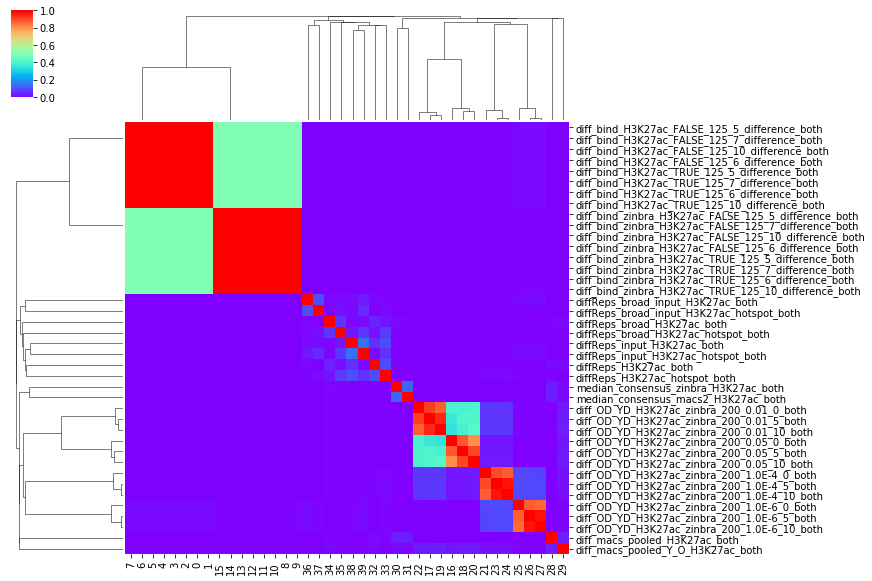

In [10]:
do_plot("jaccard")

In [11]:
print_best("jaccard")

,f1,f2,score
0,diff_macs_pooled_H3K27ac_both.bed,diff_macs_pooled_Y_O_H3K27ac_both.bed,0.039773
1,diff_macs_pooled_Y_O_H3K27ac_both.bed,diff_OD_YD_H3K27ac_zinbra_200_0.01_10_both.bed,0.039112
2,diff_macs_pooled_H3K27ac_both.bed,median_consensus_macs2_H3K27ac_both.bed,0.037932
3,diffReps_broad_H3K27ac_both.bed,diff_macs_pooled_Y_O_H3K27ac_both.bed,0.014320
4,diff_bind_H3K27ac_TRUE_125_6_difference_both.bed,diff_OD_YD_H3K27ac_zinbra_200_1.0E-6_10_both.bed,0.014286
5,diffReps_input_H3K27ac_hotspot_both.bed,diff_OD_YD_H3K27ac_zinbra_200_1.0E-6_10_both.bed,0.013514
6,diff_macs_pooled_Y_O_H3K27ac_both.bed,median_consensus_zinbra_H3K27ac_both.bed,0.013193
7,diffReps_H3K27ac_both.bed,diff_macs_pooled_H3K27ac_both.bed,0.012211
8,diffReps_broad_H3K27ac_both.bed,median_consensus_zinbra_H3K27ac_both.bed,0.008483
9,diff_macs_pooled_H3K27ac_both.bed,diff_OD_YD_H3K27ac_zinbra_200_0.05_10_both.bed,0.001942


In [12]:
print_best("m1")

,f1,f2,score
0,diffReps_broad_input_H3K27ac_hotspot_both.bed,diff_OD_YD_H3K27ac_zinbra_200_0.05_0_both.bed,1.000000
1,diff_bind_H3K27ac_TRUE_125_6_difference_both.bed,diff_OD_YD_H3K27ac_zinbra_200_0.05_0_both.bed,1.000000
2,diff_bind_H3K27ac_TRUE_125_6_difference_both.bed,diff_macs_pooled_Y_O_H3K27ac_both.bed,1.000000
3,diffReps_input_H3K27ac_hotspot_both.bed,diff_macs_pooled_Y_O_H3K27ac_both.bed,0.900000
4,diff_OD_YD_H3K27ac_zinbra_200_1.0E-6_10_both.bed,diff_macs_pooled_Y_O_H3K27ac_both.bed,0.764286
5,diffReps_input_H3K27ac_hotspot_both.bed,median_consensus_zinbra_H3K27ac_both.bed,0.500000
6,diffReps_input_H3K27ac_hotspot_both.bed,diff_macs_pooled_H3K27ac_both.bed,0.500000
7,diff_macs_pooled_H3K27ac_both.bed,diff_macs_pooled_Y_O_H3K27ac_both.bed,0.182190
8,diff_macs_pooled_Y_O_H3K27ac_both.bed,diff_OD_YD_H3K27ac_zinbra_200_0.05_10_both.bed,0.126043
9,median_consensus_zinbra_H3K27ac_both.bed,diff_macs_pooled_Y_O_H3K27ac_both.bed,0.105093


In [13]:
diffs.get_bed_files_produced()

['diff_bind_H3K27ac_TRUE_125_6_difference_both.bed',
 'diff_bind_H3K27ac_TRUE_125_10_difference_both.bed',
 'diff_bind_H3K27ac_TRUE_125_7_difference_both.bed',
 'diff_bind_H3K27ac_TRUE_125_5_difference_both.bed',
 'diff_bind_H3K27ac_FALSE_125_6_difference_both.bed',
 'diff_bind_H3K27ac_FALSE_125_10_difference_both.bed',
 'diff_bind_H3K27ac_FALSE_125_7_difference_both.bed',
 'diff_bind_H3K27ac_FALSE_125_5_difference_both.bed',
 'diff_bind_zinbra_H3K27ac_TRUE_125_6_difference_both.bed',
 'diff_bind_zinbra_H3K27ac_TRUE_125_10_difference_both.bed',
 'diff_bind_zinbra_H3K27ac_TRUE_125_7_difference_both.bed',
 'diff_bind_zinbra_H3K27ac_TRUE_125_5_difference_both.bed',
 'diff_bind_zinbra_H3K27ac_FALSE_125_6_difference_both.bed',
 'diff_bind_zinbra_H3K27ac_FALSE_125_10_difference_both.bed',
 'diff_bind_zinbra_H3K27ac_FALSE_125_7_difference_both.bed',
 'diff_bind_zinbra_H3K27ac_FALSE_125_5_difference_both.bed',
 'diff_OD_YD_H3K27ac_zinbra_200_0.05_0_both.bed',
 'diff_OD_YD_H3K27ac_zinbra_200_0.

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27ac/both/diff_macs_pooled_H3K27ac_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27ac/both/diffReps_H3K27ac_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27ac/both/diff_OD_YD_H3K27ac_zinbra_200_1.0E-4_0_both.bed >/tmp/tmpb9tbi1eg.tmp/counts.bed


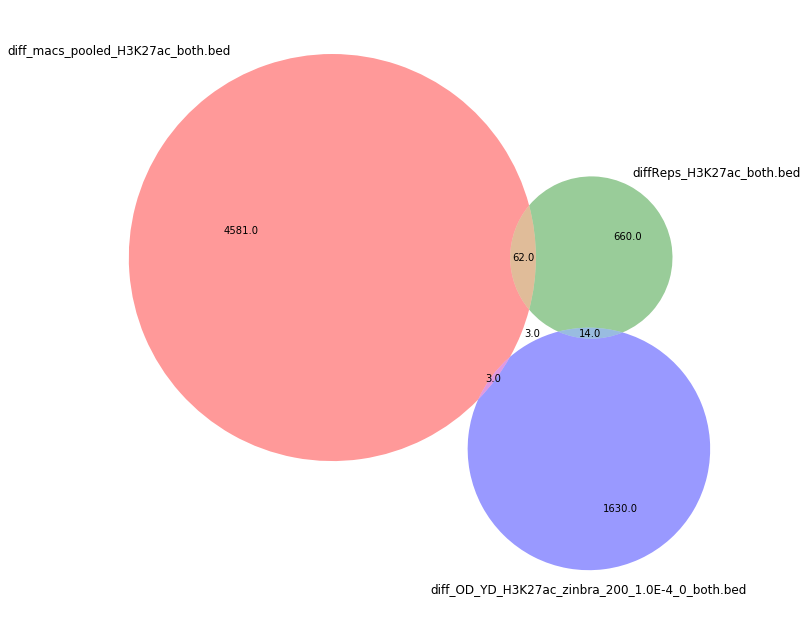

In [14]:
diffs.plot_venn3('diff_macs_pooled_H3K27ac_both.bed', 
                 'diffReps_H3K27ac_both.bed', 
                 'diff_OD_YD_H3K27ac_zinbra_200_1.0E-4_0_both.bed')

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27ac/both/diff_macs_pooled_Y_O_H3K27ac_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27ac/both/diffReps_H3K27ac_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27ac/both/diff_OD_YD_H3K27ac_zinbra_200_1.0E-4_0_both.bed >/tmp/tmp38gsu7z4.tmp/counts.bed


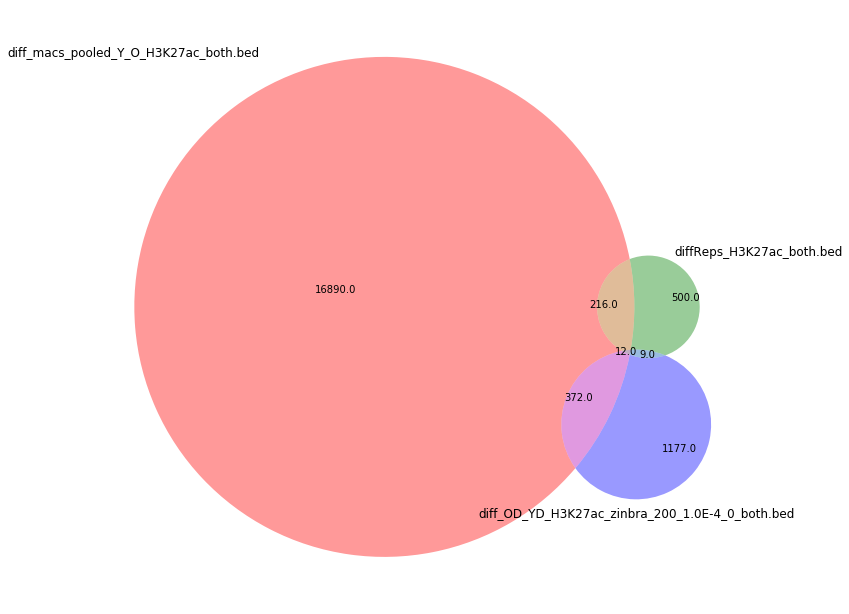

In [15]:
diffs.plot_venn3('diff_macs_pooled_Y_O_H3K27ac_both.bed', 
                 'diffReps_H3K27ac_both.bed', 
                 'diff_OD_YD_H3K27ac_zinbra_200_1.0E-4_0_both.bed')

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27ac/both/diffReps_broad_H3K27ac_hotspot_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27ac/both/diff_macs_pooled_Y_O_H3K27ac_both.bed >/tmp/tmpebiicwlz.tmp/counts.bed
0


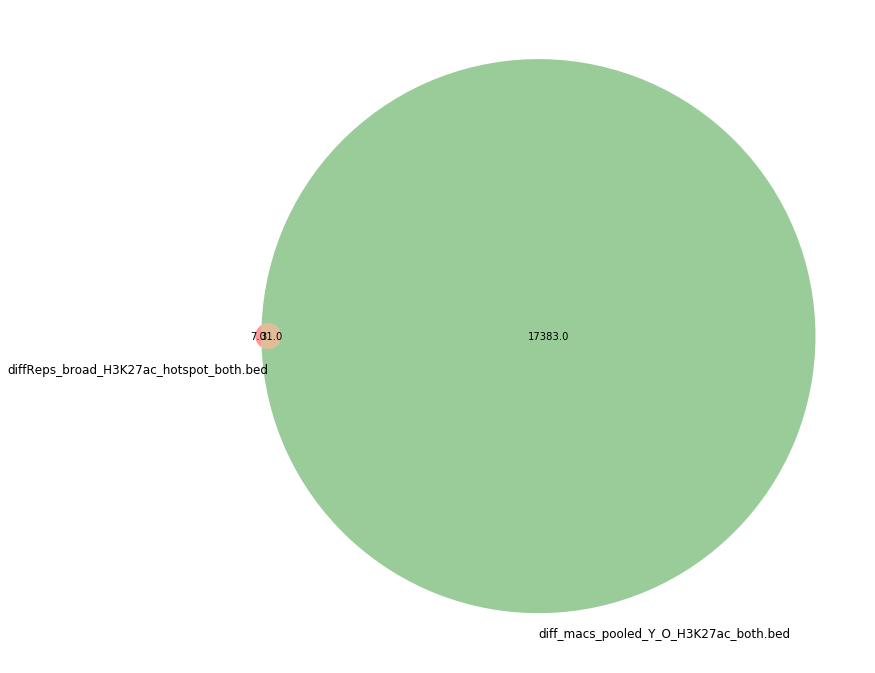

In [16]:
diffs.plot_venn2('diffReps_broad_H3K27ac_hotspot_both.bed', 'diff_macs_pooled_Y_O_H3K27ac_both.bed')

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27ac/both/diff_OD_YD_H3K27ac_zinbra_200_1.0E-6_10_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27ac/both/diff_macs_pooled_Y_O_H3K27ac_both.bed >/tmp/tmpbn2kl1xm.tmp/counts.bed
0


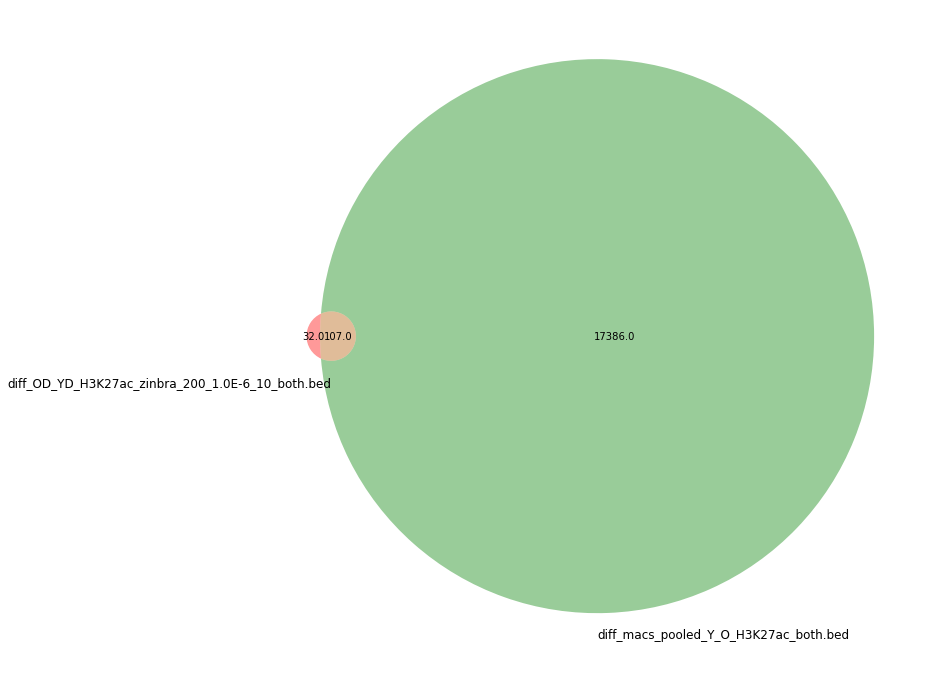

In [17]:
diffs.plot_venn2('diff_OD_YD_H3K27ac_zinbra_200_1.0E-6_10_both.bed', 
                 'diff_macs_pooled_Y_O_H3K27ac_both.bed')

# H3K27me3

In [18]:
diffs = diffs_dict['H3K27me3']

In [19]:
pd.DataFrame.from_records(diffs.get_counts(), columns=["name", "both", "young", "old"])

,name,both,young,old
0,diff_bind_H3K27me3_TRUE_125_6_difference,0,0,0
1,diff_bind_H3K27me3_TRUE_125_10_difference,0,0,0
2,diff_bind_H3K27me3_TRUE_125_7_difference,0,0,0
3,diff_bind_H3K27me3_TRUE_125_5_difference,0,0,0
4,diff_bind_H3K27me3_FALSE_125_6_difference,2,2,0
5,diff_bind_H3K27me3_FALSE_125_10_difference,2,2,0
6,diff_bind_H3K27me3_FALSE_125_7_difference,2,2,0
7,diff_bind_H3K27me3_FALSE_125_5_difference,3,3,0
8,diff_bind_zinbra_H3K27me3_TRUE_125_6_difference,5,1,4
9,diff_bind_zinbra_H3K27me3_TRUE_125_10_difference,5,1,4


/tmp/tmpwildc3n6.tmp


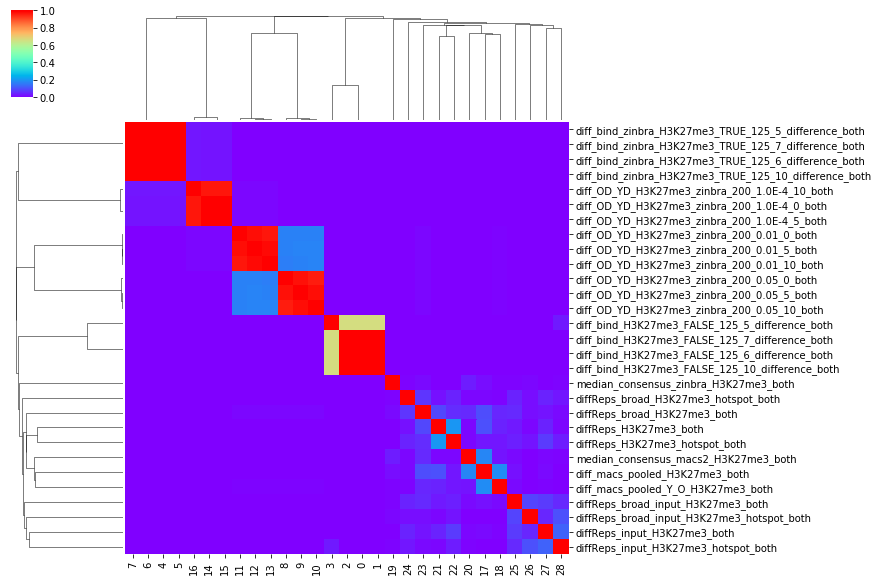

In [20]:
intersection = diffs.count_intersections()

do_plot("jaccard")

In [21]:
print_best("jaccard")

,f1,f2,score
0,diff_macs_pooled_H3K27me3_both.bed,diff_macs_pooled_Y_O_H3K27me3_both.bed,0.183596
1,diff_macs_pooled_H3K27me3_both.bed,median_consensus_macs2_H3K27me3_both.bed,0.177946
2,diffReps_H3K27me3_both.bed,diff_macs_pooled_H3K27me3_both.bed,0.102140
3,diffReps_broad_H3K27me3_both.bed,median_consensus_macs2_H3K27me3_both.bed,0.053045
4,diffReps_broad_H3K27me3_both.bed,diff_macs_pooled_Y_O_H3K27me3_both.bed,0.050465
5,diffReps_input_H3K27me3_hotspot_both.bed,diff_bind_H3K27me3_FALSE_125_5_difference_both...,0.032258
6,diff_bind_zinbra_H3K27me3_TRUE_125_6_differenc...,diff_OD_YD_H3K27me3_zinbra_200_1.0E-4_10_both.bed,0.027778
7,diff_macs_pooled_Y_O_H3K27me3_both.bed,median_consensus_macs2_H3K27me3_both.bed,0.026132
8,diffReps_broad_H3K27me3_both.bed,diff_OD_YD_H3K27me3_zinbra_200_0.01_10_both.bed,0.010796
9,diff_macs_pooled_Y_O_H3K27me3_both.bed,diff_OD_YD_H3K27me3_zinbra_200_0.05_10_both.bed,0.006178


In [22]:
print_best("m1")

,f1,f2,score
0,diffReps_H3K27me3_hotspot_both.bed,diff_macs_pooled_H3K27me3_both.bed,0.980892
1,diffReps_broad_input_H3K27me3_hotspot_both.bed,diff_macs_pooled_Y_O_H3K27me3_both.bed,0.640000
2,diffReps_broad_input_H3K27me3_hotspot_both.bed,median_consensus_macs2_H3K27me3_both.bed,0.640000
3,diffReps_broad_input_H3K27me3_hotspot_both.bed,diff_OD_YD_H3K27me3_zinbra_200_0.05_0_both.bed,0.640000
4,median_consensus_macs2_H3K27me3_both.bed,diff_macs_pooled_H3K27me3_both.bed,0.502671
5,diff_macs_pooled_Y_O_H3K27me3_both.bed,diff_macs_pooled_H3K27me3_both.bed,0.403484
6,diff_bind_zinbra_H3K27me3_TRUE_125_6_differenc...,diff_OD_YD_H3K27me3_zinbra_200_0.05_0_both.bed,0.400000
7,diff_bind_H3K27me3_FALSE_125_5_difference_both...,diffReps_input_H3K27me3_hotspot_both.bed,0.333333
8,diff_macs_pooled_H3K27me3_both.bed,diff_macs_pooled_Y_O_H3K27me3_both.bed,0.251996
9,diff_macs_pooled_H3K27me3_both.bed,median_consensus_macs2_H3K27me3_both.bed,0.215968


In [23]:
diffs.get_bed_files_produced()

['diff_bind_H3K27me3_FALSE_125_6_difference_both.bed',
 'diff_bind_H3K27me3_FALSE_125_10_difference_both.bed',
 'diff_bind_H3K27me3_FALSE_125_7_difference_both.bed',
 'diff_bind_H3K27me3_FALSE_125_5_difference_both.bed',
 'diff_bind_zinbra_H3K27me3_TRUE_125_6_difference_both.bed',
 'diff_bind_zinbra_H3K27me3_TRUE_125_10_difference_both.bed',
 'diff_bind_zinbra_H3K27me3_TRUE_125_7_difference_both.bed',
 'diff_bind_zinbra_H3K27me3_TRUE_125_5_difference_both.bed',
 'diff_OD_YD_H3K27me3_zinbra_200_0.05_0_both.bed',
 'diff_OD_YD_H3K27me3_zinbra_200_0.05_5_both.bed',
 'diff_OD_YD_H3K27me3_zinbra_200_0.05_10_both.bed',
 'diff_OD_YD_H3K27me3_zinbra_200_0.01_0_both.bed',
 'diff_OD_YD_H3K27me3_zinbra_200_0.01_5_both.bed',
 'diff_OD_YD_H3K27me3_zinbra_200_0.01_10_both.bed',
 'diff_OD_YD_H3K27me3_zinbra_200_1.0E-4_0_both.bed',
 'diff_OD_YD_H3K27me3_zinbra_200_1.0E-4_5_both.bed',
 'diff_OD_YD_H3K27me3_zinbra_200_1.0E-4_10_both.bed',
 'diff_macs_pooled_H3K27me3_both.bed',
 'diff_macs_pooled_Y_O_H3K2

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diff_OD_YD_H3K27me3_zinbra_200_0.01_10_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diff_macs_pooled_H3K27me3_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diffReps_H3K27me3_both.bed >/tmp/tmp072vasxj.tmp/counts.bed


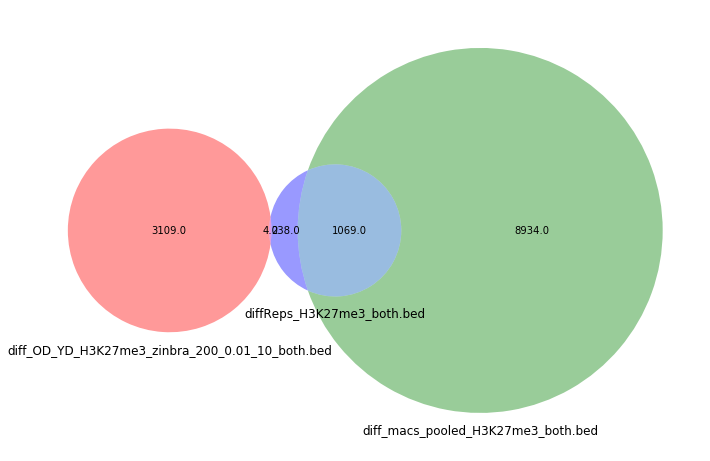

In [24]:
diffs.plot_venn3('diff_OD_YD_H3K27me3_zinbra_200_0.01_10_both.bed', 
                 'diff_macs_pooled_H3K27me3_both.bed',
                 'diffReps_H3K27me3_both.bed')

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diff_macs_pooled_H3K27me3_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diffReps_H3K27me3_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diffReps_broad_H3K27me3_both.bed >/tmp/tmpcp96t75o.tmp/counts.bed


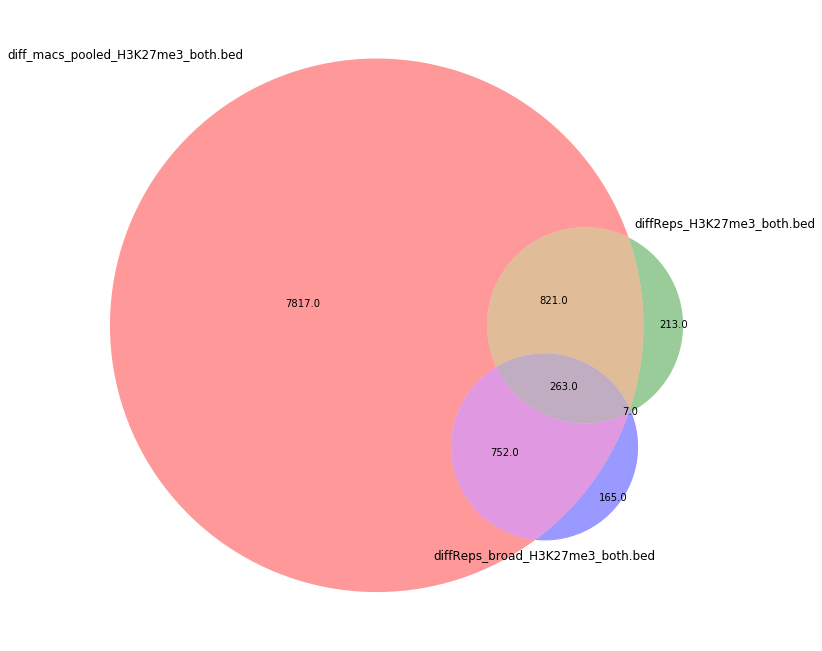

In [25]:
diffs.plot_venn3('diff_macs_pooled_H3K27me3_both.bed',
                 'diffReps_H3K27me3_both.bed',
                 'diffReps_broad_H3K27me3_both.bed')

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diff_macs_pooled_H3K27me3_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diffReps_H3K27me3_both.bed >/tmp/tmpvoaxwgg5.tmp/counts.bed
0


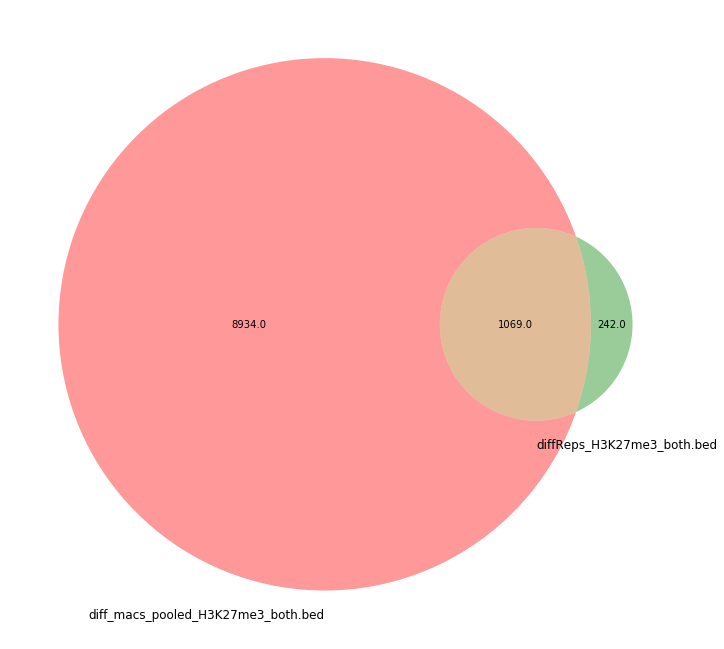

In [26]:
diffs.plot_venn2('diff_macs_pooled_H3K27me3_both.bed',
                 'diffReps_H3K27me3_both.bed')

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diff_OD_YD_H3K27me3_zinbra_200_0.05_10_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diff_macs_pooled_Y_O_H3K27me3_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K27me3/both/diffReps_broad_H3K27me3_both.bed >/tmp/tmpia1iermd.tmp/counts.bed


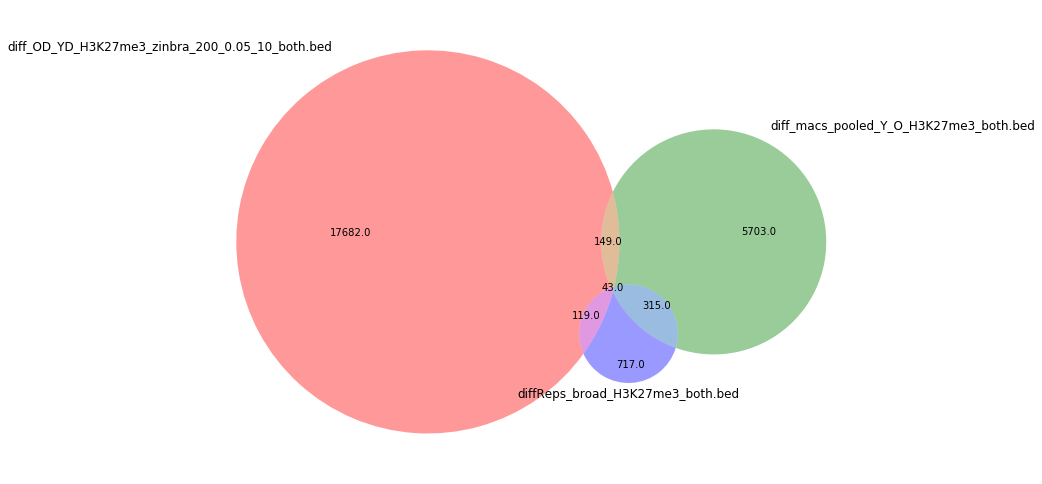

In [27]:
diffs.plot_venn3('diff_OD_YD_H3K27me3_zinbra_200_0.05_10_both.bed', 
                 'diff_macs_pooled_Y_O_H3K27me3_both.bed',
                 'diffReps_broad_H3K27me3_both.bed')

## H3K4me1

In [28]:
diffs = diffs_dict['H3K4me1']
pd.DataFrame.from_records(diffs.get_counts(), columns=["name", "both", "young", "old"])

,name,both,young,old
0,diff_bind_H3K4me1_TRUE_125_6_difference,2,0,2
1,diff_bind_H3K4me1_TRUE_125_10_difference,2,0,2
2,diff_bind_H3K4me1_TRUE_125_7_difference,2,0,2
3,diff_bind_H3K4me1_TRUE_125_5_difference,2,0,2
4,diff_bind_H3K4me1_FALSE_125_6_difference,0,0,0
5,diff_bind_H3K4me1_FALSE_125_10_difference,0,0,0
6,diff_bind_H3K4me1_FALSE_125_7_difference,0,0,0
7,diff_bind_H3K4me1_FALSE_125_5_difference,0,0,0
8,diff_bind_zinbra_H3K4me1_TRUE_125_6_difference,2,0,2
9,diff_bind_zinbra_H3K4me1_TRUE_125_10_difference,2,0,2


/tmp/tmpfizavfas.tmp


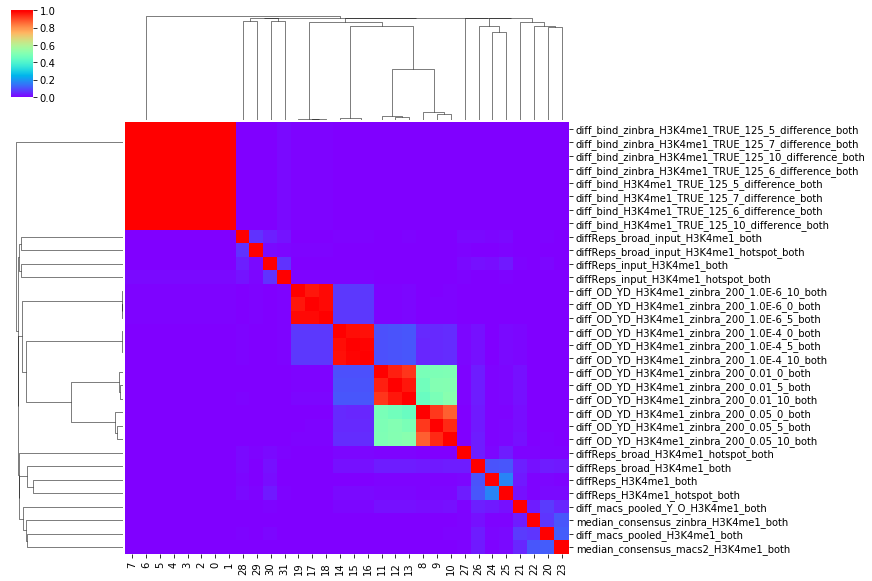

In [29]:
intersection = diffs.count_intersections()

do_plot("jaccard")

In [30]:
print_best("jaccard")

,f1,f2,score
0,diff_macs_pooled_H3K4me1_both.bed,median_consensus_macs2_H3K4me1_both.bed,0.119403
1,diff_macs_pooled_H3K4me1_both.bed,diff_macs_pooled_Y_O_H3K4me1_both.bed,0.076224
2,diff_macs_pooled_Y_O_H3K4me1_both.bed,median_consensus_macs2_H3K4me1_both.bed,0.047298
3,diffReps_broad_H3K4me1_both.bed,diff_macs_pooled_Y_O_H3K4me1_both.bed,0.040653
4,diffReps_broad_H3K4me1_both.bed,diff_OD_YD_H3K4me1_zinbra_200_0.01_10_both.bed,0.037605
5,diffReps_broad_H3K4me1_both.bed,diff_macs_pooled_H3K4me1_both.bed,0.036234
6,diffReps_broad_H3K4me1_both.bed,median_consensus_macs2_H3K4me1_both.bed,0.033772
7,diff_macs_pooled_Y_O_H3K4me1_both.bed,diff_OD_YD_H3K4me1_zinbra_200_0.05_10_both.bed,0.021790
8,diffReps_input_H3K4me1_hotspot_both.bed,diff_bind_H3K4me1_TRUE_125_6_difference_both.bed,0.015385
9,diff_bind_H3K4me1_TRUE_125_6_difference_both.bed,diff_OD_YD_H3K4me1_zinbra_200_1.0E-6_10_both.bed,0.005000


In [31]:
print_best("m1")

,f1,f2,score
0,diff_bind_H3K4me1_TRUE_125_6_difference_both.bed,diff_OD_YD_H3K4me1_zinbra_200_0.05_0_both.bed,1.000000
1,diff_bind_H3K4me1_TRUE_125_6_difference_both.bed,diff_macs_pooled_Y_O_H3K4me1_both.bed,1.000000
2,diffReps_broad_input_H3K4me1_hotspot_both.bed,diff_OD_YD_H3K4me1_zinbra_200_0.05_0_both.bed,0.888889
3,diffReps_broad_input_H3K4me1_hotspot_both.bed,diff_macs_pooled_Y_O_H3K4me1_both.bed,0.777778
4,diffReps_broad_input_H3K4me1_hotspot_both.bed,diff_macs_pooled_H3K4me1_both.bed,0.777778
5,diffReps_broad_H3K4me1_hotspot_both.bed,median_consensus_macs2_H3K4me1_both.bed,0.566667
6,diff_bind_H3K4me1_TRUE_125_6_difference_both.bed,diffReps_H3K4me1_both.bed,0.500000
7,diff_OD_YD_H3K4me1_zinbra_200_1.0E-6_10_both.bed,diff_macs_pooled_Y_O_H3K4me1_both.bed,0.271357
8,median_consensus_macs2_H3K4me1_both.bed,diff_macs_pooled_H3K4me1_both.bed,0.247339
9,diff_macs_pooled_H3K4me1_both.bed,median_consensus_macs2_H3K4me1_both.bed,0.187548


In [32]:
diffs.get_bed_files_produced()

['diff_bind_H3K4me1_TRUE_125_6_difference_both.bed',
 'diff_bind_H3K4me1_TRUE_125_10_difference_both.bed',
 'diff_bind_H3K4me1_TRUE_125_7_difference_both.bed',
 'diff_bind_H3K4me1_TRUE_125_5_difference_both.bed',
 'diff_bind_zinbra_H3K4me1_TRUE_125_6_difference_both.bed',
 'diff_bind_zinbra_H3K4me1_TRUE_125_10_difference_both.bed',
 'diff_bind_zinbra_H3K4me1_TRUE_125_7_difference_both.bed',
 'diff_bind_zinbra_H3K4me1_TRUE_125_5_difference_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_0.05_0_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_0.05_5_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_0.05_10_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_0.01_0_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_0.01_5_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_0.01_10_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_1.0E-4_0_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_1.0E-4_5_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_1.0E-4_10_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_1.0E-6_0_both.bed',
 'diff_OD_YD_H3K4me1_zinbra_200_1.0

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me1/both/diff_OD_YD_H3K4me1_zinbra_200_1.0E-4_5_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me1/both/diff_macs_pooled_Y_O_H3K4me1_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me1/both/diffReps_H3K4me1_both.bed >/tmp/tmpqg2sfmo4.tmp/counts.bed


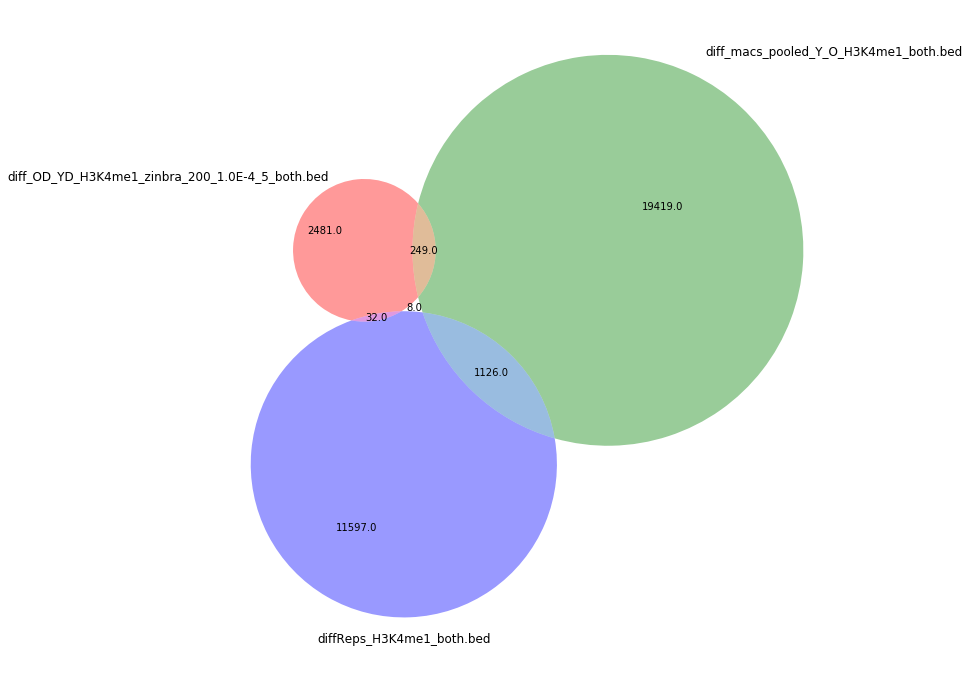

In [33]:
diffs.plot_venn3('diff_OD_YD_H3K4me1_zinbra_200_1.0E-4_5_both.bed', 
                 'diff_macs_pooled_Y_O_H3K4me1_both.bed',
                 'diffReps_H3K4me1_both.bed')

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me1/both/diffReps_broad_input_H3K4me1_hotspot_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me1/both/diff_OD_YD_H3K4me1_zinbra_200_0.05_0_both.bed >/tmp/tmpph3ei1zk.tmp/counts.bed
0


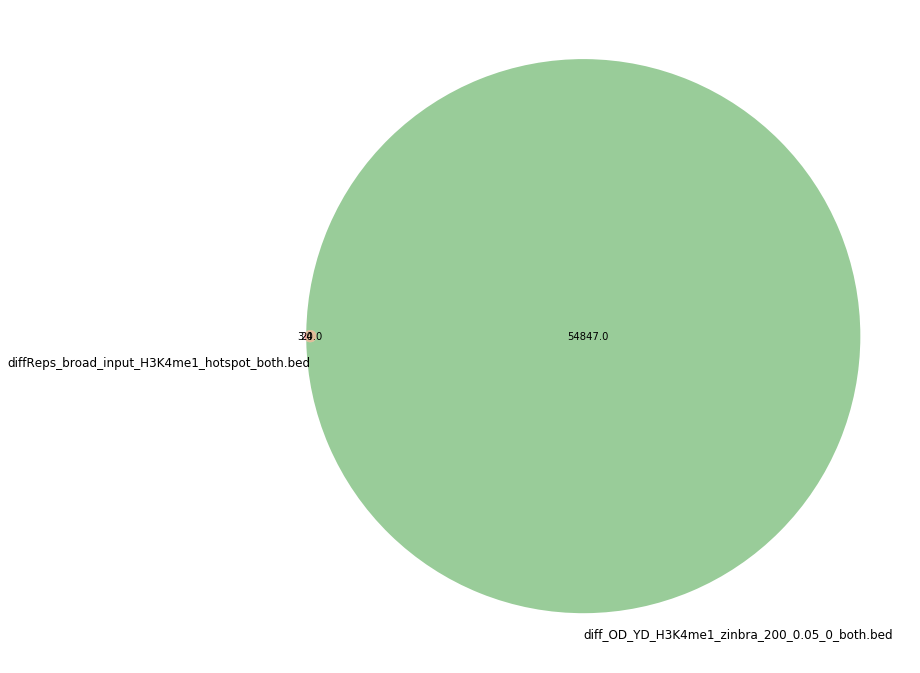

In [34]:
diffs.plot_venn2("diffReps_broad_input_H3K4me1_hotspot_both.bed",
                 "diff_OD_YD_H3K4me1_zinbra_200_0.05_0_both.bed")

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me1/both/median_consensus_macs2_H3K4me1_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me1/both/diff_macs_pooled_H3K4me1_both.bed >/tmp/tmpk6mmm9zm.tmp/counts.bed
0


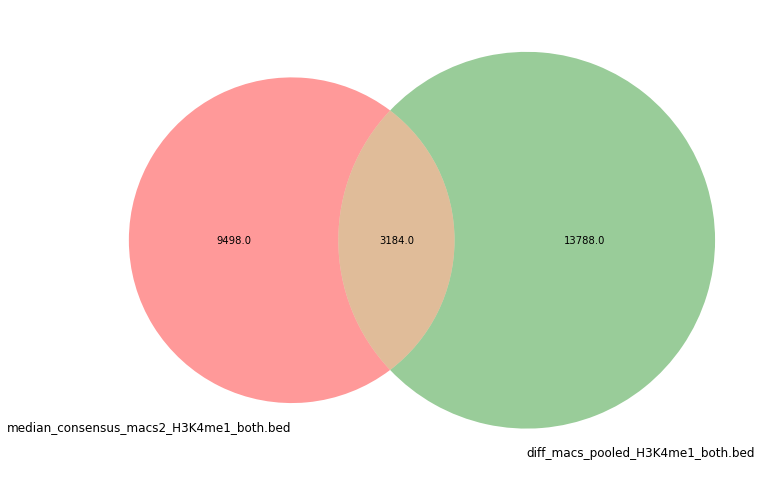

In [35]:
diffs.plot_venn2("median_consensus_macs2_H3K4me1_both.bed", 
                 "diff_macs_pooled_H3K4me1_both.bed")

## H3K4me3

In [36]:
diffs = diffs_dict['H3K4me3']
pd.DataFrame.from_records(diffs.get_counts(), columns=["name", "both", "young", "old"])

,name,both,young,old
0,diff_bind_H3K4me3_TRUE_125_6_difference,30,29,1
1,diff_bind_H3K4me3_TRUE_125_10_difference,30,29,1
2,diff_bind_H3K4me3_TRUE_125_7_difference,30,29,1
3,diff_bind_H3K4me3_TRUE_125_5_difference,32,31,1
4,diff_bind_H3K4me3_FALSE_125_6_difference,489,488,1
5,diff_bind_H3K4me3_FALSE_125_10_difference,489,488,1
6,diff_bind_H3K4me3_FALSE_125_7_difference,489,488,1
7,diff_bind_H3K4me3_FALSE_125_5_difference,489,488,1
8,diff_bind_zinbra_H3K4me3_TRUE_125_6_difference,1448,1446,2
9,diff_bind_zinbra_H3K4me3_TRUE_125_10_difference,1448,1446,2


/tmp/tmpxq7c8d30.tmp


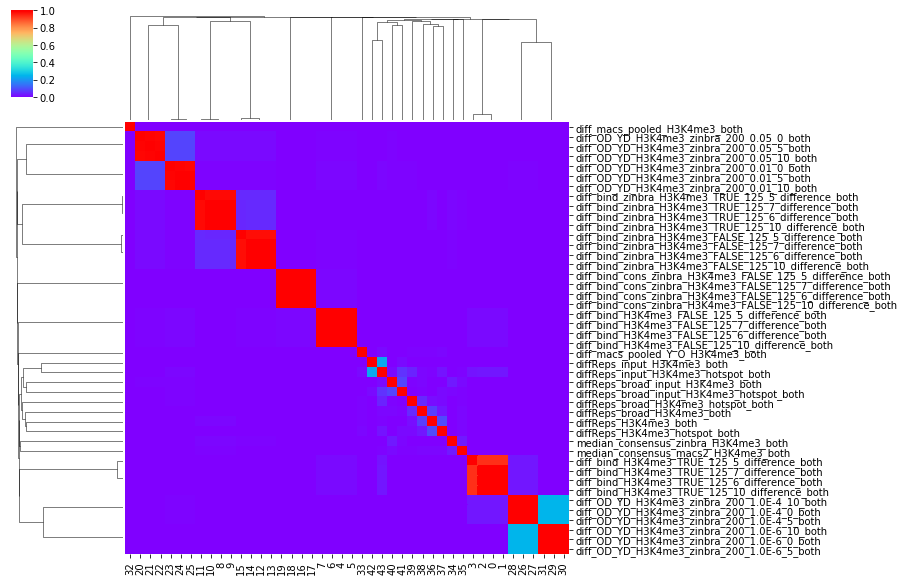

In [37]:
intersection = diffs.count_intersections()

do_plot("jaccard")

In [38]:
print_best("jaccard")

,f1,f2,score
0,diffReps_broad_input_H3K4me3_both.bed,median_consensus_zinbra_H3K4me3_both.bed,0.031374
1,diff_bind_H3K4me3_TRUE_125_6_difference_both.bed,diff_OD_YD_H3K4me3_zinbra_200_1.0E-4_0_both.bed,0.030303
2,diffReps_input_H3K4me3_hotspot_both.bed,diff_bind_H3K4me3_TRUE_125_6_difference_both.bed,0.027778
3,diffReps_input_H3K4me3_hotspot_both.bed,diff_macs_pooled_Y_O_H3K4me3_both.bed,0.015385
4,diffReps_input_H3K4me3_hotspot_both.bed,diff_OD_YD_H3K4me3_zinbra_200_0.01_10_both.bed,0.009023
5,diff_bind_zinbra_H3K4me3_TRUE_125_5_difference...,median_consensus_zinbra_H3K4me3_both.bed,0.008869
6,diff_macs_pooled_Y_O_H3K4me3_both.bed,median_consensus_zinbra_H3K4me3_both.bed,0.002176
7,diff_macs_pooled_Y_O_H3K4me3_both.bed,diff_OD_YD_H3K4me3_zinbra_200_0.01_10_both.bed,0.001269
8,median_consensus_zinbra_H3K4me3_both.bed,diff_OD_YD_H3K4me3_zinbra_200_0.05_10_both.bed,0.000418
9,diffReps_H3K4me3_both.bed,diff_macs_pooled_H3K4me3_both.bed,0.000000


In [39]:
print_best("m1")

,f1,f2,score
0,diffReps_input_H3K4me3_hotspot_both.bed,median_consensus_zinbra_H3K4me3_both.bed,1.000000
1,diffReps_input_H3K4me3_hotspot_both.bed,diff_OD_YD_H3K4me3_zinbra_200_0.05_0_both.bed,1.000000
2,diff_bind_cons_zinbra_H3K4me3_FALSE_125_6_diff...,diff_OD_YD_H3K4me3_zinbra_200_0.05_0_both.bed,1.000000
3,diffReps_input_H3K4me3_hotspot_both.bed,diff_bind_zinbra_H3K4me3_TRUE_125_6_difference...,0.714286
4,diffReps_input_H3K4me3_hotspot_both.bed,diff_macs_pooled_Y_O_H3K4me3_both.bed,0.285714
5,diff_OD_YD_H3K4me3_zinbra_200_1.0E-4_0_both.bed,diff_bind_H3K4me3_TRUE_125_6_difference_both.bed,0.250000
6,diff_macs_pooled_Y_O_H3K4me3_both.bed,diffReps_H3K4me3_both.bed,0.072000
7,diff_bind_H3K4me3_TRUE_125_6_difference_both.bed,diffReps_H3K4me3_both.bed,0.066667
8,diff_macs_pooled_Y_O_H3K4me3_both.bed,median_consensus_zinbra_H3K4me3_both.bed,0.040000
9,median_consensus_zinbra_H3K4me3_both.bed,diffReps_broad_input_H3K4me3_both.bed,0.036272


In [40]:
diffs.get_bed_files_produced()

['diff_bind_H3K4me3_TRUE_125_6_difference_both.bed',
 'diff_bind_H3K4me3_TRUE_125_10_difference_both.bed',
 'diff_bind_H3K4me3_TRUE_125_7_difference_both.bed',
 'diff_bind_H3K4me3_TRUE_125_5_difference_both.bed',
 'diff_bind_H3K4me3_FALSE_125_6_difference_both.bed',
 'diff_bind_H3K4me3_FALSE_125_10_difference_both.bed',
 'diff_bind_H3K4me3_FALSE_125_7_difference_both.bed',
 'diff_bind_H3K4me3_FALSE_125_5_difference_both.bed',
 'diff_bind_zinbra_H3K4me3_TRUE_125_6_difference_both.bed',
 'diff_bind_zinbra_H3K4me3_TRUE_125_10_difference_both.bed',
 'diff_bind_zinbra_H3K4me3_TRUE_125_7_difference_both.bed',
 'diff_bind_zinbra_H3K4me3_TRUE_125_5_difference_both.bed',
 'diff_bind_zinbra_H3K4me3_FALSE_125_6_difference_both.bed',
 'diff_bind_zinbra_H3K4me3_FALSE_125_10_difference_both.bed',
 'diff_bind_zinbra_H3K4me3_FALSE_125_7_difference_both.bed',
 'diff_bind_zinbra_H3K4me3_FALSE_125_5_difference_both.bed',
 'diff_bind_cons_zinbra_H3K4me3_FALSE_125_6_difference_both.bed',
 'diff_bind_cons_z

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me3/both/diff_OD_YD_H3K4me3_zinbra_200_0.01_10_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me3/both/diffReps_H3K4me3_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me3/both/diff_macs_pooled_Y_O_H3K4me3_both.bed >/tmp/tmpj1af3nxi.tmp/counts.bed


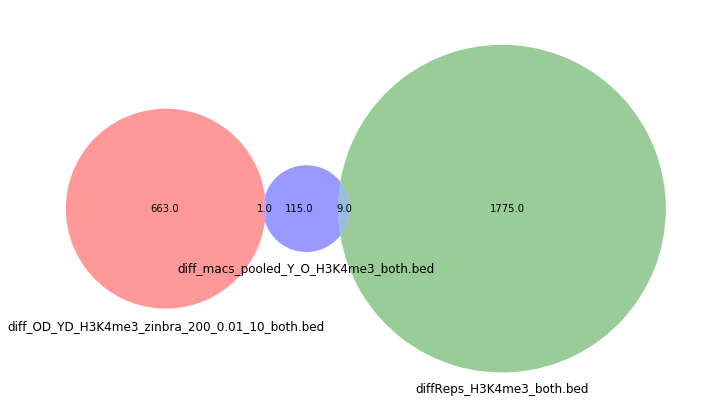

In [41]:
diffs.plot_venn3('diff_OD_YD_H3K4me3_zinbra_200_0.01_10_both.bed', 
                 'diffReps_H3K4me3_both.bed',
                 'diff_macs_pooled_Y_O_H3K4me3_both.bed')

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me3/both/diff_OD_YD_H3K4me3_zinbra_200_0.05_10_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me3/both/diffReps_broad_H3K4me3_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K4me3/both/diff_macs_pooled_Y_O_H3K4me3_both.bed >/tmp/tmprii91oic.tmp/counts.bed


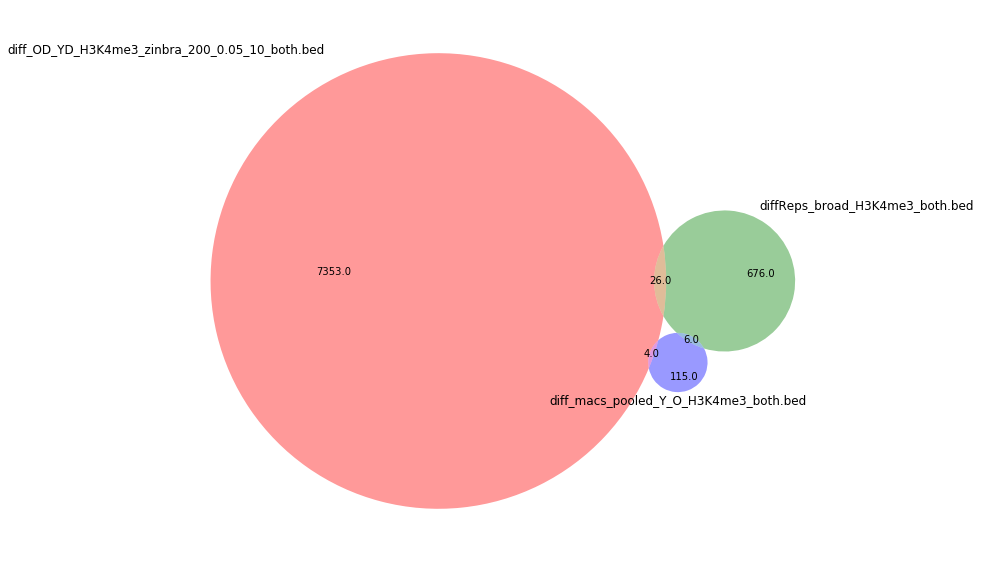

In [42]:
diffs.plot_venn3('diff_OD_YD_H3K4me3_zinbra_200_0.05_10_both.bed', 
                 'diffReps_broad_H3K4me3_both.bed',
                 'diff_macs_pooled_Y_O_H3K4me3_both.bed')

## H3K36me3

In [43]:
diffs = diffs_dict['H3K36me3']
pd.DataFrame.from_records(diffs.get_counts(), columns=["name", "both", "young", "old"])

,name,both,young,old
0,diff_bind_H3K36me3_TRUE_125_6_difference,7,0,7
1,diff_bind_H3K36me3_TRUE_125_10_difference,7,0,7
2,diff_bind_H3K36me3_TRUE_125_7_difference,7,0,7
3,diff_bind_H3K36me3_TRUE_125_5_difference,7,0,7
4,diff_bind_H3K36me3_FALSE_125_6_difference,2,0,2
5,diff_bind_H3K36me3_FALSE_125_10_difference,2,0,2
6,diff_bind_H3K36me3_FALSE_125_7_difference,2,0,2
7,diff_bind_H3K36me3_FALSE_125_5_difference,2,0,2
8,diff_bind_zinbra_H3K36me3_TRUE_125_6_difference,2,0,2
9,diff_bind_zinbra_H3K36me3_TRUE_125_10_difference,2,0,2


/tmp/tmp4q39bk8v.tmp


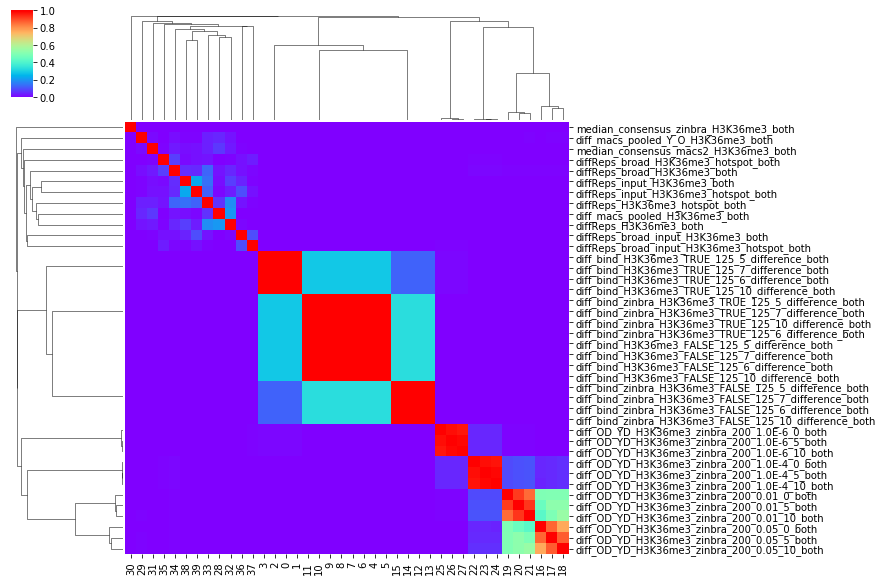

In [44]:
intersection = diffs.count_intersections()

do_plot("jaccard")

In [45]:
print_best("jaccard")

,f1,f2,score
0,diffReps_H3K36me3_both.bed,diff_macs_pooled_H3K36me3_both.bed,0.203766
1,diff_macs_pooled_H3K36me3_both.bed,median_consensus_macs2_H3K36me3_both.bed,0.071479
2,diff_macs_pooled_H3K36me3_both.bed,diff_macs_pooled_Y_O_H3K36me3_both.bed,0.049718
3,diffReps_H3K36me3_hotspot_both.bed,median_consensus_macs2_H3K36me3_both.bed,0.042086
4,diffReps_H3K36me3_hotspot_both.bed,diff_macs_pooled_Y_O_H3K36me3_both.bed,0.040312
5,diff_macs_pooled_Y_O_H3K36me3_both.bed,median_consensus_macs2_H3K36me3_both.bed,0.012511
6,diff_bind_H3K36me3_TRUE_125_6_difference_both.bed,diff_OD_YD_H3K36me3_zinbra_200_1.0E-6_10_both.bed,0.011583
7,diffReps_broad_H3K36me3_both.bed,diff_OD_YD_H3K36me3_zinbra_200_1.0E-4_10_both.bed,0.008559
8,diff_macs_pooled_Y_O_H3K36me3_both.bed,diff_OD_YD_H3K36me3_zinbra_200_0.05_10_both.bed,0.005167
9,median_consensus_zinbra_H3K36me3_both.bed,diff_OD_YD_H3K36me3_zinbra_200_1.0E-4_10_both.bed,0.001857


In [46]:
print_best("m1")

,f1,f2,score
0,diff_bind_H3K36me3_TRUE_125_6_difference_both.bed,diff_OD_YD_H3K36me3_zinbra_200_0.05_0_both.bed,1.000000
1,diffReps_broad_H3K36me3_hotspot_both.bed,diff_macs_pooled_H3K36me3_both.bed,0.990826
2,diffReps_broad_H3K36me3_hotspot_both.bed,median_consensus_macs2_H3K36me3_both.bed,0.834862
3,diffReps_broad_H3K36me3_hotspot_both.bed,diff_OD_YD_H3K36me3_zinbra_200_0.05_0_both.bed,0.770642
4,diff_bind_zinbra_H3K36me3_FALSE_125_6_differen...,median_consensus_zinbra_H3K36me3_both.bed,0.500000
5,diff_bind_zinbra_H3K36me3_FALSE_125_6_differen...,diff_macs_pooled_H3K36me3_both.bed,0.500000
6,diff_macs_pooled_Y_O_H3K36me3_both.bed,diff_macs_pooled_H3K36me3_both.bed,0.315125
7,median_consensus_macs2_H3K36me3_both.bed,diff_macs_pooled_H3K36me3_both.bed,0.282119
8,diffReps_broad_input_H3K36me3_hotspot_both.bed,diff_macs_pooled_Y_O_H3K36me3_both.bed,0.250000
9,diff_macs_pooled_H3K36me3_both.bed,diffReps_H3K36me3_both.bed,0.234454


In [47]:
diffs.get_bed_files_produced()

['diff_bind_H3K36me3_TRUE_125_6_difference_both.bed',
 'diff_bind_H3K36me3_TRUE_125_10_difference_both.bed',
 'diff_bind_H3K36me3_TRUE_125_7_difference_both.bed',
 'diff_bind_H3K36me3_TRUE_125_5_difference_both.bed',
 'diff_bind_H3K36me3_FALSE_125_6_difference_both.bed',
 'diff_bind_H3K36me3_FALSE_125_10_difference_both.bed',
 'diff_bind_H3K36me3_FALSE_125_7_difference_both.bed',
 'diff_bind_H3K36me3_FALSE_125_5_difference_both.bed',
 'diff_bind_zinbra_H3K36me3_TRUE_125_6_difference_both.bed',
 'diff_bind_zinbra_H3K36me3_TRUE_125_10_difference_both.bed',
 'diff_bind_zinbra_H3K36me3_TRUE_125_7_difference_both.bed',
 'diff_bind_zinbra_H3K36me3_TRUE_125_5_difference_both.bed',
 'diff_bind_zinbra_H3K36me3_FALSE_125_6_difference_both.bed',
 'diff_bind_zinbra_H3K36me3_FALSE_125_10_difference_both.bed',
 'diff_bind_zinbra_H3K36me3_FALSE_125_7_difference_both.bed',
 'diff_bind_zinbra_H3K36me3_FALSE_125_5_difference_both.bed',
 'diff_OD_YD_H3K36me3_zinbra_200_0.05_0_both.bed',
 'diff_OD_YD_H3K3

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K36me3/both/diff_OD_YD_H3K36me3_zinbra_200_1.0E-4_10_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K36me3/both/diffReps_H3K36me3_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K36me3/both/diff_macs_pooled_Y_O_H3K36me3_both.bed >/tmp/tmpaaayqph5.tmp/counts.bed


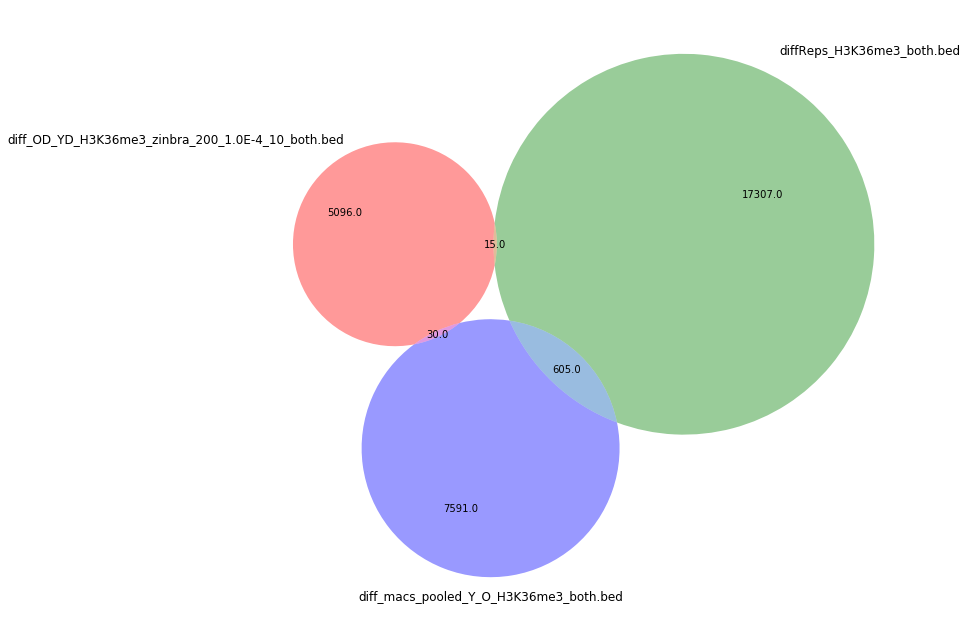

In [48]:
diffs.plot_venn3('diff_OD_YD_H3K36me3_zinbra_200_1.0E-4_10_both.bed', 
                 'diffReps_H3K36me3_both.bed',
                 'diff_macs_pooled_Y_O_H3K36me3_both.bed')

bash /home/atsky/work/washu/bed/union.sh /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K36me3/both/diff_OD_YD_H3K36me3_zinbra_200_1.0E-4_10_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K36me3/both/diffReps_broad_H3K36me3_both.bed /mnt/stripe/bio/experiments/compare-chip-seq-tools/processed/H3K36me3/both/diff_macs_pooled_Y_O_H3K36me3_both.bed >/tmp/tmpmhyvliuk.tmp/counts.bed


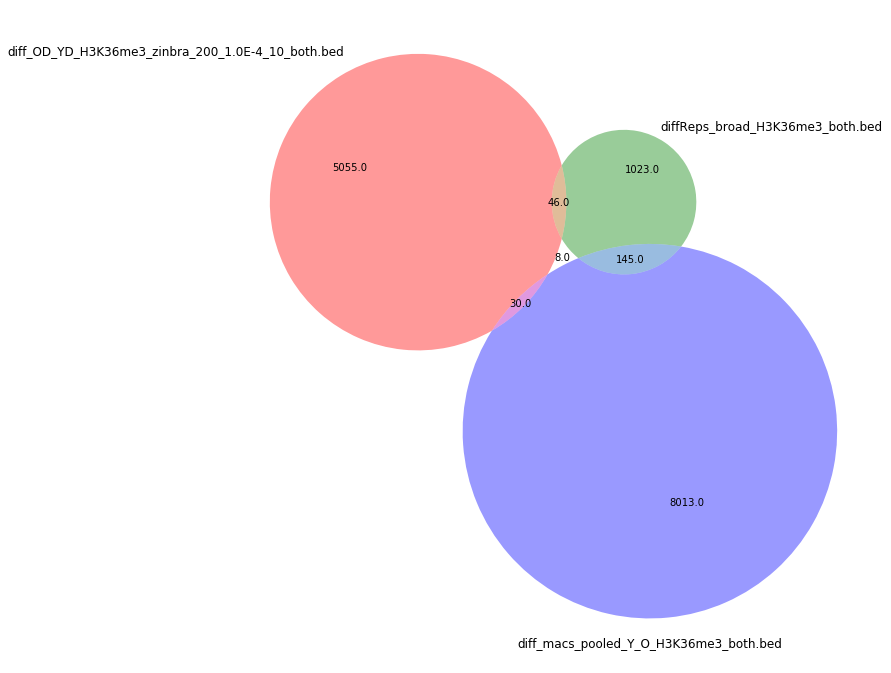

In [49]:
diffs.plot_venn3('diff_OD_YD_H3K36me3_zinbra_200_1.0E-4_10_both.bed',
                 'diffReps_broad_H3K36me3_both.bed',
                 'diff_macs_pooled_Y_O_H3K36me3_both.bed')